In [145]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import norm
from scipy.optimize import minimize

In [146]:
aapl = yf.Ticker('aapl')
aapl

yfinance.Ticker object <AAPL>

In [147]:
aapl.options

('2022-11-25',
 '2022-12-02',
 '2022-12-09',
 '2022-12-16',
 '2022-12-23',
 '2022-12-30',
 '2023-01-20',
 '2023-02-17',
 '2023-03-17',
 '2023-04-21',
 '2023-05-19',
 '2023-06-16',
 '2023-07-21',
 '2023-09-15',
 '2024-01-19',
 '2024-03-15',
 '2024-06-21',
 '2025-01-17')

In [148]:
opt = aapl.option_chain(date = '2022-12-16')
opt_calls = pd.DataFrame(opt.calls)
opt_calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL221216C00030000,2022-11-15 15:08:55+00:00,30.0,123.35,121.10,121.75,0.000000,0.000000,2,1,2.519535,True,REGULAR,USD
1,AAPL221216C00035000,2022-11-11 15:15:22+00:00,35.0,112.30,116.15,116.75,0.000000,0.000000,4,22,2.335942,True,REGULAR,USD
2,AAPL221216C00040000,2022-11-15 16:26:30+00:00,40.0,112.28,111.15,111.75,0.000000,0.000000,6,389,2.128911,True,REGULAR,USD
3,AAPL221216C00045000,2022-11-02 18:35:32+00:00,45.0,106.50,106.15,106.80,0.000000,0.000000,238,483,1.984375,True,REGULAR,USD
4,AAPL221216C00050000,2022-11-18 20:46:59+00:00,50.0,101.73,101.20,101.80,1.810005,1.811454,2,333,1.851563,True,REGULAR,USD
5,AAPL221216C00055000,2022-11-15 19:11:18+00:00,55.0,95.40,96.05,96.70,0.000000,0.000000,2,147,1.515627,True,REGULAR,USD
6,AAPL221216C00060000,2022-11-18 16:29:35+00:00,60.0,91.76,91.15,91.85,2.510002,2.812327,2,176,1.564455,True,REGULAR,USD
7,AAPL221216C00065000,2022-11-03 18:58:33+00:00,65.0,75.37,86.25,86.90,0.000000,0.000000,50,139,1.503909,True,REGULAR,USD
8,AAPL221216C00070000,2022-11-17 19:20:53+00:00,70.0,80.04,81.25,81.90,0.000000,0.000000,60,386,1.382816,True,REGULAR,USD
9,AAPL221216C00075000,2022-11-18 14:48:09+00:00,75.0,76.34,76.25,76.75,4.839996,6.769226,12,531,1.212895,True,REGULAR,USD


In [149]:
class BlackScholes:
    """ 
    Class to calculate (European) call and put option prices through the Black-Scholes formula 
    without dividends
    
    :param S: Price of underlying stock
    :param K: Strike price
    :param T: Time till expiration (in years)
    :param r: Risk-free interest rate (0.05 indicates 5%)
    :param sigma: Volatility (standard deviation) of stock (0.15 indicates 15%)
    """
    def _d1(self, S, K, T, r, sigma):
        return (1 / (sigma * np.sqrt(T))) * (np.log(S/K) + (r + sigma**2 / 2) * T)
    
    def _d2(self, S, K, T, r, sigma):
        return self._d1(S, K, T, r, sigma) - sigma * np.sqrt(T)
    
    def call_price(self, S, K, T, r, sigma):
        """ Main method for calculating price of a call option """
        d1 = self._d1(S, K, T, r, sigma)
        d2 = self._d2(S, K, T, r, sigma)
        return norm.cdf(d1) * S - norm.cdf(d2) * K * np.exp(-r*T)
    
    def put_price(self, S, K, T, r, sigma):
        """ Main method for calculating price of a put option """
        d1 = self._d1(S, K, T, r, sigma)
        d2 = self._d2(S, K, T, r, sigma)
        return norm.cdf(-d2) * K * np.exp(-r*T) - norm.cdf(-d1) * S
    
    def call_in_the_money(self, S, K, T, r, sigma):
        """ 
        Calculate probability that call option will be in the money at
        maturity according to Black-Scholes.
        """
        d2 = self._d2(S, K, T, r, sigma)
        return norm.cdf(d2)
    
    def put_in_the_money(self, S, K, T, r, sigma):
        """ 
        Calculate probability that put option will be in the money at
        maturity according to Black-Scholes.
        """
        d2 = self._d2(S, K, T, r, sigma)
        return 1 - norm.cdf(d2)

In [150]:
S = 149.70 # Stock price
K = 160 # Strike price
T = 34/365 # Time till expiration (in years)
r = 0.03819 # Risk-free interest rate
sigma = opt_calls['impliedVolatility'][26] # Volatility (standard deviation)
sigma

0.2995675512695312

In [151]:
BlackScholes().call_price(S, K, T, r, sigma)

2.0552717216798015

In [152]:
traded_price = opt_calls['lastPrice'][26]
traded_price

1.82

In [153]:
opt = aapl.option_chain

## Comparing with different expiry dates in 2022

In [155]:
opt = aapl.option_chain(date = '2022-11-25')
opt_calls_1 = pd.DataFrame(opt.calls)
opt_calls_1.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL221125C00070000,2022-10-17 17:44:18+00:00,70.0,72.40,78.75,79.30,0.000000,0.000000,NaN,0,0.000010,True,REGULAR,USD
1,AAPL221125C00075000,2022-11-15 19:11:26+00:00,75.0,75.00,76.00,76.55,0.000000,0.000000,2.0,6,2.658206,True,REGULAR,USD
2,AAPL221125C00085000,2022-11-17 19:20:39+00:00,85.0,65.02,66.10,66.65,65.020000,NaN,NaN,1,1.906250,True,REGULAR,USD
3,AAPL221125C00090000,2022-11-18 18:08:49+00:00,90.0,60.80,61.05,61.65,0.149998,0.247317,1.0,3,1.664064,True,REGULAR,USD
4,AAPL221125C00100000,2022-11-18 17:49:04+00:00,100.0,50.85,51.15,51.70,-1.480003,-2.828212,80.0,22,1.503909,True,REGULAR,USD


In [156]:
opt = aapl.option_chain(date = '2022-12-02')
opt_calls_2 = pd.DataFrame(opt.calls)
opt_calls_2.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL221202C00050000,2022-11-17 17:10:04+00:00,50.0,99.91,101.15,101.70,99.91,NaN,NaN,4,2.515629,True,REGULAR,USD
1,AAPL221202C00075000,2022-10-28 18:35:05+00:00,75.0,81.35,76.15,76.70,0.00,0.0,15.0,15,1.644533,True,REGULAR,USD
2,AAPL221202C00090000,2022-11-07 16:42:29+00:00,90.0,47.35,61.20,61.75,0.00,0.0,10.0,10,1.310550,True,REGULAR,USD
3,AAPL221202C00100000,2022-11-16 16:47:38+00:00,100.0,48.70,51.20,51.80,0.00,0.0,1.0,6,1.091801,True,REGULAR,USD
4,AAPL221202C00105000,2022-11-17 14:36:31+00:00,105.0,42.48,46.25,46.80,0.00,0.0,1.0,3,0.997070,True,REGULAR,USD


In [157]:
opt = aapl.option_chain(date = '2022-12-09')
opt_calls_3 = pd.DataFrame(opt.calls)
opt_calls_3.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL221209C00070000,2022-11-10 14:30:58+00:00,70.0,71.90,81.15,81.85,0.0,0.0,NaN,1,1.537112,True,REGULAR,USD
1,AAPL221209C00090000,2022-11-07 14:36:01+00:00,90.0,47.16,61.20,61.80,0.0,0.0,NaN,1,1.076176,True,REGULAR,USD
2,AAPL221209C00100000,2022-11-01 16:07:24+00:00,100.0,50.75,51.10,51.80,0.0,0.0,NaN,10,0.844728,True,REGULAR,USD
3,AAPL221209C00105000,2022-11-11 17:35:27+00:00,105.0,43.47,46.15,46.80,0.0,0.0,2.0,4,0.773440,True,REGULAR,USD
4,AAPL221209C00110000,2022-11-17 16:57:04+00:00,110.0,40.33,41.30,41.95,0.0,0.0,1.0,6,0.760256,True,REGULAR,USD


In [158]:
opt = aapl.option_chain(date = '2022-12-23')
opt_calls_4 = pd.DataFrame(opt.calls)
opt_calls_4.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL221223C00050000,2022-11-16 15:22:44+00:00,50.0,97.95,101.20,101.90,97.95,0.0,2.0,1,1.701173,True,REGULAR,USD
1,AAPL221223C00055000,2022-11-07 16:37:08+00:00,55.0,82.85,96.20,96.90,0.00,0.0,NaN,1,1.562502,True,REGULAR,USD
2,AAPL221223C00075000,2022-11-18 14:52:52+00:00,75.0,76.75,76.30,76.85,76.75,NaN,2.0,0,1.131840,True,REGULAR,USD
3,AAPL221223C00090000,2022-11-15 18:27:26+00:00,90.0,60.18,61.45,61.90,0.00,0.0,1.0,1,0.910157,True,REGULAR,USD
4,AAPL221223C00100000,2022-11-14 16:29:57+00:00,100.0,48.26,51.50,52.15,0.00,0.0,4.0,25,0.794924,True,REGULAR,USD


In [159]:
opt = aapl.option_chain(date = '2022-12-30')
opt_calls_5 = pd.DataFrame(opt.calls)
opt_calls_5.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL221230C00050000,2022-11-11 15:14:46+00:00,50.0,97.20,101.35,101.85,0.00,0.0,NaN,1,1.589846,True,REGULAR,USD
1,AAPL221230C00060000,2022-11-16 16:54:58+00:00,60.0,88.45,91.40,91.90,88.45,0.0,1.0,1,1.375003,True,REGULAR,USD
2,AAPL221230C00065000,2022-11-18 15:35:23+00:00,65.0,86.20,86.40,86.95,86.20,NaN,2.0,0,1.279300,True,REGULAR,USD
3,AAPL221230C00070000,2022-11-18 15:35:23+00:00,70.0,81.25,81.50,81.95,81.25,NaN,2.0,0,1.201176,True,REGULAR,USD
4,AAPL221230C00075000,2022-11-14 18:24:45+00:00,75.0,75.00,76.50,76.95,0.00,0.0,NaN,3,1.104497,True,REGULAR,USD


In [160]:
volume_calls= opt_calls["contractSymbol"].count()
volume_calls

53

In [161]:
volume_calls_1= opt_calls_1["contractSymbol"].count()
volume_calls_1

60

In [162]:
volume_calls_2= opt_calls_2["contractSymbol"].count()
volume_calls_2

60

In [163]:
volume_calls_3= opt_calls_3["contractSymbol"].count()
volume_calls_3

56

In [164]:
volume_calls_4= opt_calls_4["contractSymbol"].count()
volume_calls_4

57

In [165]:
volume_calls_5= opt_calls_5["contractSymbol"].count()
volume_calls_5

50

In [166]:
from datetime import datetime, timedelta
from matplotlib import dates as mpl_dates

In [167]:
plt.style.use('seaborn')

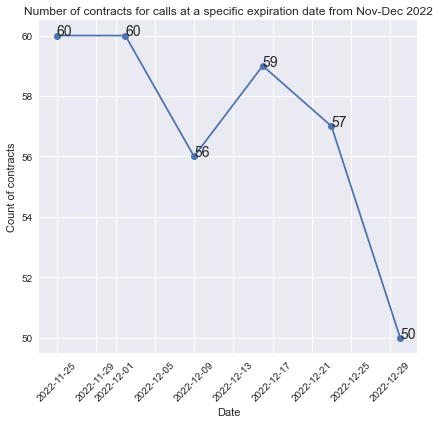

In [168]:
fig, ax = plt.subplots(figsize = (6,6))

dates = [
    datetime(2022, 11, 25),
    datetime(2022, 12, 2),
    datetime(2022, 12, 9),
    datetime(2022, 12, 16),
    datetime(2022, 12, 23),
    datetime(2022, 12, 30)
]

y= [volume_calls_1, volume_calls_2, volume_calls_3, volume, volume_calls_4, volume_calls_5]

plt.plot_date(dates, y, linestyle= "solid")

plt.title("Number of contracts for calls at a specific expiration date from Nov-Dec 2022")
plt.xlabel("Date")
plt.xticks(rotation = 45)
plt.ylabel("Count of contracts")
for index in range(len(dates)): ax.text(dates[index], y[index], y[index], size= 14)

plt.tight_layout()

plt.show()

For a specific expiration date, how many put and call? Using the bar chart will be appropriate

But first, let create a line-graph of options that are on 'put'

In [169]:
opt = aapl.option_chain(date = '2022-11-25')
opt_puts_1 = pd.DataFrame(opt.puts)
opt_puts_1.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL221125P00070000,2022-11-18 14:44:56+00:00,70.0,0.01,0.0,0.01,0.0,0.0,1.0,202,1.875001,False,REGULAR,USD
1,AAPL221125P00075000,2022-11-11 14:40:00+00:00,75.0,0.01,0.0,0.01,0.0,0.0,50.0,91,1.750001,False,REGULAR,USD
2,AAPL221125P00080000,2022-11-14 15:51:26+00:00,80.0,0.01,0.0,0.01,0.0,0.0,5.0,157,1.562502,False,REGULAR,USD
3,AAPL221125P00085000,2022-11-11 18:52:33+00:00,85.0,0.01,0.0,0.01,0.0,0.0,204.0,229,1.437503,False,REGULAR,USD
4,AAPL221125P00090000,2022-11-11 16:02:50+00:00,90.0,0.01,0.0,0.01,0.0,0.0,7.0,545,1.312503,False,REGULAR,USD


In [170]:
opt = aapl.option_chain(date = '2022-12-02')
opt_puts_2 = pd.DataFrame(opt.puts)
opt_puts_2.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL221202P00070000,2022-11-16 15:02:13+00:00,70.0,0.01,0.0,0.01,0.0,0.0,70.0,1372,1.281254,False,REGULAR,USD
1,AAPL221202P00075000,2022-11-14 14:44:44+00:00,75.0,0.01,0.0,0.01,0.0,0.0,4.0,48,1.187504,False,REGULAR,USD
2,AAPL221202P00080000,2022-11-11 18:07:59+00:00,80.0,0.01,0.0,0.01,0.0,0.0,1.0,311,1.062505,False,REGULAR,USD
3,AAPL221202P00085000,2022-11-18 15:39:56+00:00,85.0,0.01,0.0,0.01,0.0,0.0,15.0,40,0.968750,False,REGULAR,USD
4,AAPL221202P00090000,2022-11-18 14:44:37+00:00,90.0,0.01,0.0,0.01,0.0,0.0,10.0,2550,0.875001,False,REGULAR,USD


In [171]:
opt = aapl.option_chain(date = '2022-12-16')
opt_puts = pd.DataFrame(opt.puts)
opt_puts.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL221216P00030000,2022-11-18 19:37:19+00:00,30.0,0.01,0.0,0.01,0.0,0.0,50.0,4169,1.812501,False,REGULAR,USD
1,AAPL221216P00035000,2022-11-01 14:04:00+00:00,35.0,0.01,0.0,0.01,0.0,0.0,1.0,2062,1.656252,False,REGULAR,USD
2,AAPL221216P00040000,2022-10-28 13:31:02+00:00,40.0,0.02,0.0,0.01,0.0,0.0,5.0,2626,1.500002,False,REGULAR,USD
3,AAPL221216P00045000,2022-11-09 17:22:06+00:00,45.0,0.01,0.0,0.01,0.0,0.0,1.0,3135,1.375003,False,REGULAR,USD
4,AAPL221216P00050000,2022-11-08 19:22:44+00:00,50.0,0.01,0.0,0.01,0.0,0.0,50.0,3255,1.250004,False,REGULAR,USD


In [172]:
opt = aapl.option_chain(date = '2022-12-09')
opt_puts_3 = pd.DataFrame(opt.puts)
opt_puts_3.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL221209P00070000,2022-11-11 19:50:08+00:00,70.0,0.01,0.0,0.01,0.0,0.0,105.0,156,1.031255,False,REGULAR,USD
1,AAPL221209P00080000,2022-11-11 15:14:15+00:00,80.0,0.03,0.0,0.01,0.0,0.0,1.0,65,0.875001,False,REGULAR,USD
2,AAPL221209P00085000,2022-11-16 15:32:28+00:00,85.0,0.01,0.0,0.02,0.0,0.0,1.0,228,0.828127,False,REGULAR,USD
3,AAPL221209P00090000,2022-11-14 20:09:08+00:00,90.0,0.02,0.0,0.02,0.0,0.0,3.0,117,0.750003,False,REGULAR,USD
4,AAPL221209P00095000,2022-11-17 20:17:59+00:00,95.0,0.03,0.0,0.03,0.0,0.0,24.0,165,0.710940,False,REGULAR,USD


In [173]:
opt = aapl.option_chain(date = '2022-12-23')
opt_puts_4 = pd.DataFrame(opt.puts)
opt_puts_4.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL221223P00050000,2022-11-09 17:26:21+00:00,50.0,0.02,0.00,0.02,0.00,0.0,1.0,2,1.187504,False,REGULAR,USD
1,AAPL221223P00065000,2022-11-18 20:19:47+00:00,65.0,0.01,0.00,0.02,-0.01,-50.0,1.0,26,0.921876,False,REGULAR,USD
2,AAPL221223P00070000,2022-11-09 16:37:42+00:00,70.0,0.06,0.00,0.02,0.00,0.0,NaN,6,0.843752,False,REGULAR,USD
3,AAPL221223P00075000,2022-11-17 20:14:43+00:00,75.0,0.01,0.01,0.03,0.00,0.0,2.0,35,0.820314,False,REGULAR,USD
4,AAPL221223P00080000,2022-11-11 14:48:31+00:00,80.0,0.04,0.00,0.04,0.00,0.0,NaN,33,0.750003,False,REGULAR,USD


In [174]:
opt = aapl.option_chain(date = '2022-12-30')
opt_puts_5 = pd.DataFrame(opt.puts)
opt_puts_5.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL221230P00050000,2022-11-18 14:44:09+00:00,50.0,0.01,0.00,0.02,0.01,NaN,2.0,0,1.078130,False,REGULAR,USD
1,AAPL221230P00075000,2022-11-11 14:37:59+00:00,75.0,0.10,0.00,0.03,0.00,0.000000,NaN,5,0.726565,False,REGULAR,USD
2,AAPL221230P00080000,2022-11-18 18:40:24+00:00,80.0,0.04,0.01,0.04,0.04,33.333336,50.0,0,0.695316,False,REGULAR,USD
3,AAPL221230P00085000,2022-11-18 19:25:03+00:00,85.0,0.04,0.02,0.05,0.04,NaN,11.0,0,0.660160,False,REGULAR,USD
4,AAPL221230P00090000,2022-11-18 19:00:45+00:00,90.0,0.05,0.04,0.07,-0.01,-16.666664,10.0,17,0.628910,False,REGULAR,USD


In [175]:
volume_puts= opt_puts["contractSymbol"].count()
volume_puts

53

In [176]:
volume_puts_1= opt_puts_1["contractSymbol"].count()
volume_puts_1

59

In [177]:
volume_puts_2= opt_puts_2["contractSymbol"].count()
volume_puts_2

57

In [178]:
volume_puts_3= opt_puts_3["contractSymbol"].count()
volume_puts_3

53

In [179]:
volume_puts_4= opt_puts_4["contractSymbol"].count()
volume_puts_4

52

In [180]:
volume_puts_5= opt_puts_5["contractSymbol"].count()
volume_puts_5

50

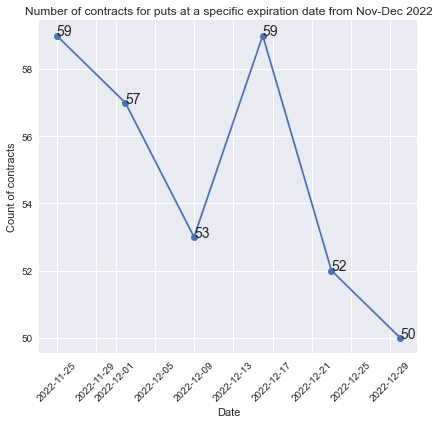

In [181]:
fig, ax = plt.subplots(figsize = (6,6))

dates = [
    datetime(2022, 11, 25),
    datetime(2022, 12, 2),
    datetime(2022, 12, 9),
    datetime(2022, 12, 16),
    datetime(2022, 12, 23),
    datetime(2022, 12, 30)
]

y= [volume_puts_1, volume_puts_2, volume_puts_3, volume, volume_puts_4, volume_puts_5]

plt.plot_date(dates, y, linestyle= "solid")

plt.title("Number of contracts for puts at a specific expiration date from Nov-Dec 2022")
plt.xlabel("Date")
plt.xticks(rotation = 45)
plt.ylabel("Count of contracts")
for index in range(len(dates)): ax.text(dates[index], y[index], y[index], size= 14)

plt.tight_layout()

plt.show()

In [182]:
calls = [volume_calls_1, volume_calls_2, volume_calls_3, volume, volume_calls_4, volume_calls_5]
puts  = [volume_puts_1, volume_puts_2, volume_puts_3, volume, volume_puts_4, volume_puts_5]
dates = [datetime(2022, 11, 25),
    datetime(2022, 12, 2),
    datetime(2022, 12, 9),
    datetime(2022, 12, 16),
    datetime(2022, 12, 23),
    datetime(2022, 12, 30)] 

options_bar = pd.DataFrame({'expiration date': dates,
                            'volume of calls': calls,
                            'volume of puts': puts})
                             

In [183]:
options_bar

,expiration date,volume of calls,volume of puts
0,2022-11-25,60,59
1,2022-12-02,60,57
2,2022-12-09,56,53
3,2022-12-16,59,59
4,2022-12-23,57,52
5,2022-12-30,50,50


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '2022-11-25 00:00:00'),
  Text(1, 0, '2022-12-02 00:00:00'),
  Text(2, 0, '2022-12-09 00:00:00'),
  Text(3, 0, '2022-12-16 00:00:00'),
  Text(4, 0, '2022-12-23 00:00:00'),
  Text(5, 0, '2022-12-30 00:00:00')])

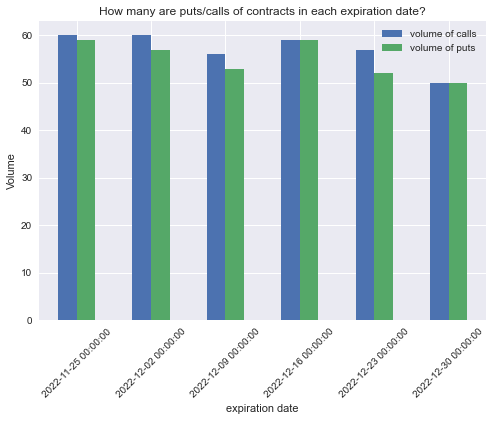

In [184]:
options_bar.plot(x= "expiration date", y =["volume of calls", "volume of puts"], kind= "bar")
plt.ylabel("Volume")
plt.title("How many are puts/calls of contracts in each expiration date?")
plt.xticks(rotation = 45)

measure the strike price with the last price to check the sensitivity

In [185]:
opt_combined = pd.concat([opt_calls, opt_puts])
opt_combined

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL221216C00030000,2022-11-15 15:08:55+00:00,30.0,123.35,121.10,121.75,0.000000,0.000000,2.0,1,2.519535,True,REGULAR,USD
1,AAPL221216C00035000,2022-11-11 15:15:22+00:00,35.0,112.30,116.15,116.75,0.000000,0.000000,4.0,22,2.335942,True,REGULAR,USD
2,AAPL221216C00040000,2022-11-15 16:26:30+00:00,40.0,112.28,111.15,111.75,0.000000,0.000000,6.0,389,2.128911,True,REGULAR,USD
3,AAPL221216C00045000,2022-11-02 18:35:32+00:00,45.0,106.50,106.15,106.80,0.000000,0.000000,238.0,483,1.984375,True,REGULAR,USD
4,AAPL221216C00050000,2022-11-18 20:46:59+00:00,50.0,101.73,101.20,101.80,1.810005,1.811454,2.0,333,1.851563,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48,AAPL221216P00270000,2022-11-09 18:02:18+00:00,270.0,133.65,118.35,118.95,0.000000,0.000000,59.0,0,0.958985,True,REGULAR,USD
49,AAPL221216P00275000,2022-10-13 16:19:45+00:00,275.0,134.55,125.10,125.70,0.000000,0.000000,9.0,0,1.363773,True,REGULAR,USD
50,AAPL221216P00280000,2022-11-11 18:46:11+00:00,280.0,130.80,128.35,128.95,0.000000,0.000000,2.0,0,1.008794,True,REGULAR,USD
51,AAPL221216P00285000,2022-09-26 14:01:20+00:00,285.0,131.90,134.30,134.60,0.000000,0.000000,NaN,0,1.221684,True,REGULAR,USD


In [186]:
opt_combined.shape # (112, 14)
opt_calls.shape #(59,14)
opt_puts.shape #(53, 14)

(53, 14)

In [190]:
opt_combined_cleaned= opt_combined.dropna()
opt_combined_cleaned.shape

(105, 14)

Looking at Frequencies of Strike Price and Implied Volatility with Options calls and pull datasets combined 

In [196]:
import seaborn as sns 

[Text(0.5, 1.0, 'The distribution of Implied volatility at expiry date of 2022-12-16')]

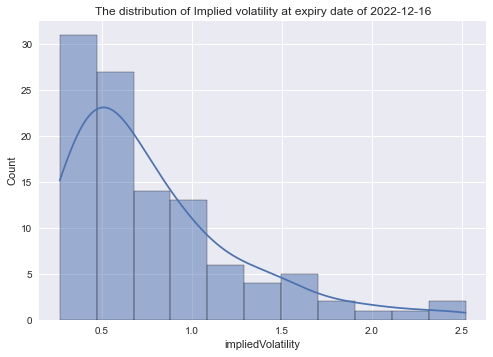

In [200]:
sns.histplot(opt_combined["impliedVolatility"], kde=True).set(title= "The distribution of Implied volatility at expiry date of 2022-12-16")

[Text(0.5, 1.0, 'The distribution of Strike Price at expiry date of 2022-12-16')]

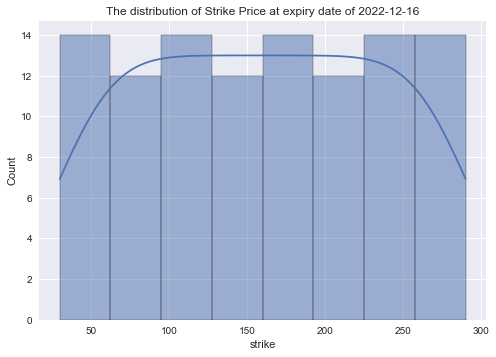

In [201]:
sns.histplot(opt_combined["strike"], kde=True).set(title= "The distribution of Strike Price at expiry date of 2022-12-16")